In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, plot_confusion_matrix
from sklearn.model_selection import cross_val_score, KFold
sns.set()

In [2]:
company = pd.read_csv('Company_Data.csv')
company

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,Good,33,14,Yes,Yes
396,6.14,139,23,3,37,120,Medium,55,11,No,Yes
397,7.41,162,26,12,368,159,Medium,40,18,Yes,Yes
398,5.94,100,79,7,284,95,Bad,50,12,Yes,Yes


In [3]:
company.describe(include = 'all')

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400,400.000000,400.000000,400,400
unique,NaN,NaN,NaN,NaN,NaN,NaN,3,NaN,NaN,2,2
top,NaN,NaN,NaN,NaN,NaN,NaN,Medium,NaN,NaN,Yes,Yes
freq,NaN,NaN,NaN,NaN,NaN,NaN,219,NaN,NaN,282,258
mean,7.496325,124.975000,68.657500,6.635000,264.840000,115.795000,NaN,53.322500,13.900000,NaN,NaN
std,2.824115,15.334512,27.986037,6.650364,147.376436,23.676664,NaN,16.200297,2.620528,NaN,NaN
min,0.000000,77.000000,21.000000,0.000000,10.000000,24.000000,NaN,25.000000,10.000000,NaN,NaN
25%,5.390000,115.000000,42.750000,0.000000,139.000000,100.000000,NaN,39.750000,12.000000,NaN,NaN
50%,7.490000,125.000000,69.000000,5.000000,272.000000,117.000000,NaN,54.500000,14.000000,NaN,NaN
75%,9.320000,135.000000,91.000000,12.000000,398.500000,131.000000,NaN,66.000000,16.000000,NaN,NaN


C:\Users\SATHISH KUMAR K\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Sales'>

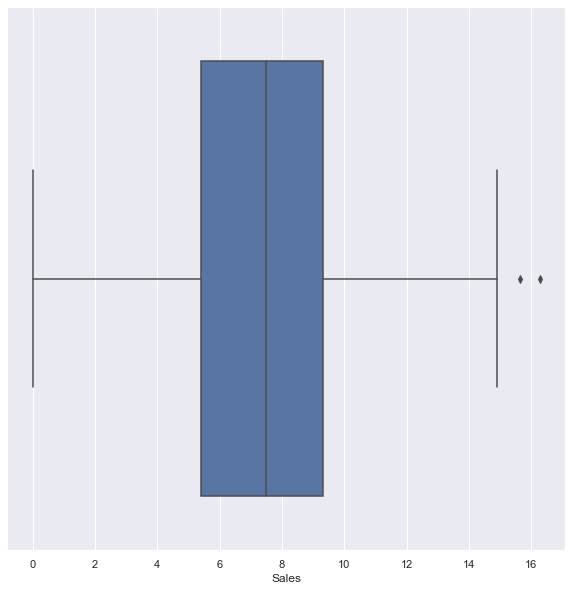

In [5]:
plt.figure(figsize = (10,10))
sns.boxplot(company['Sales'], orient = '')

In [6]:
np.percentile(company['Sales'] , 25)

5.390000000000001

In [7]:
data = company.copy()

In [8]:
x = 0
for i in company['Sales']:
    if i < np.percentile(company['Sales'] , 33):
        data['Sales'][x] = 'Low'
    elif np.percentile(company['Sales'] , 33) <= i <  np.percentile(company['Sales'] , 90):
        data['Sales'][x] = 'Average'
    else:
        data['Sales'][x] = 'High'
    x += 1

<ipython-input-8-1243c7500390>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Sales'][x] = 'Average'
C:\Users\SATHISH KUMAR K\anaconda3\lib\site-packages\pandas\core\indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
<ipython-input-8-1243c7500390>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Sales'][x] = 'Low'
<ipython-input-8-1243c7500390>:8: SettingWithCo

In [9]:
data

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,Average,138,73,11,276,120,Bad,42,17,Yes,Yes
1,Average,111,48,16,260,83,Good,65,10,Yes,Yes
2,Average,113,35,10,269,80,Medium,59,12,Yes,Yes
3,Average,117,100,4,466,97,Medium,55,14,Yes,Yes
4,Low,141,64,3,340,128,Bad,38,13,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
395,High,138,108,17,203,128,Good,33,14,Yes,Yes
396,Average,139,23,3,37,120,Medium,55,11,No,Yes
397,Average,162,26,12,368,159,Medium,40,18,Yes,Yes
398,Low,100,79,7,284,95,Bad,50,12,Yes,Yes


In [10]:
inputs = data.drop('Sales', axis = 1)

In [11]:
y = data['Sales']
X= pd.get_dummies(inputs, drop_first = True)
(X_train, X_test, y_train, y_test) = train_test_split(X, y, random_state = 42)

In [12]:
tree = DecisionTreeClassifier(criterion = 'gini', random_state = 42)

In [15]:
tree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [16]:
predictions = tree.predict(X_test)
np.mean(predictions == y_test)

0.64

In [18]:
pred_df = pd.DataFrame()
pred_df['Actual'] = y_test
pred_df['Predicted'] = predictions
pred_df

,Actual,Predicted
209,Low,Average
280,Low,Low
33,Average,Average
210,Low,Low
93,Average,Average
...,...,...
314,Average,High
373,Low,Average
380,Average,Average
239,Low,Low


In [19]:
from sklearn.metrics import confusion_matrix
cf_mat = confusion_matrix(y_test, predictions)
cf_mat

array([[37,  5, 13],
       [ 9,  5,  0],
       [ 9,  0, 22]], dtype=int64)

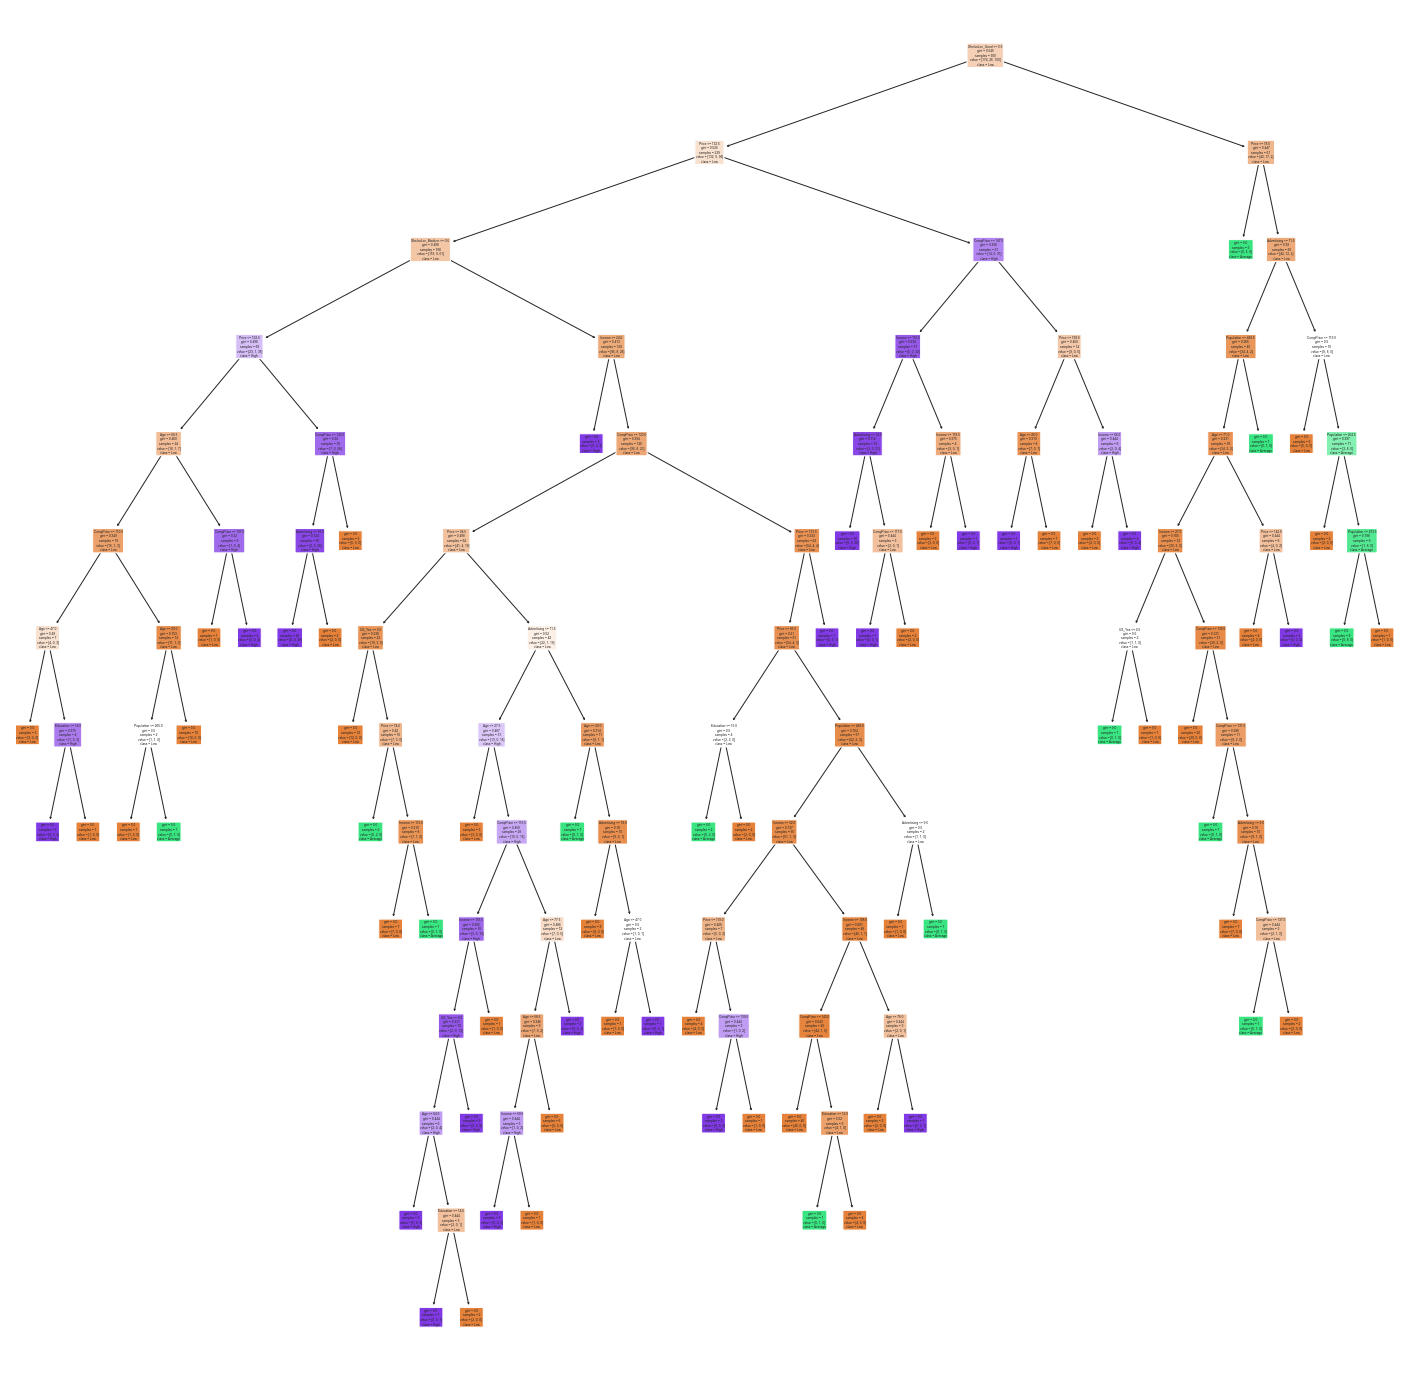

In [20]:
from sklearn.tree import plot_tree
plt.figure(figsize = (25,25))
plot_tree(tree, filled = True, rounded = True, feature_names = X.columns, class_names = ['Low', 'Average', 'High'])
plt.show()

In [21]:
#Cost Complexity Purning
pruning = tree.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas = pruning.ccp_alphas[:-1]
trees = []
for ccp_alpha in ccp_alphas:
    tree = DecisionTreeClassifier(random_state = 42 , ccp_alpha = ccp_alpha, criterion ='gini')
    tree.fit(X_train, y_train)
    trees.append(tree)
ccp_alphas

array([0.        , 0.003     , 0.003     , 0.00304545, 0.00305556,
       0.00322917, 0.00333333, 0.00371528, 0.00385185, 0.00444444,
       0.00444444, 0.00469444, 0.005     , 0.005     , 0.00533333,
       0.00549708, 0.00551515, 0.00568698, 0.00571717, 0.00575758,
       0.00583333, 0.00592593, 0.00592593, 0.00779762, 0.00790074,
       0.00808081, 0.00861953, 0.0100614 , 0.01101941, 0.01130358,
       0.01148918, 0.01244444, 0.01312417, 0.01745502, 0.01807182,
       0.02378484])

In [22]:
train_scores = [tree.score(X_train, y_train) for tree in trees]
test_scores = [tree.score(X_test, y_test) for tree in trees]

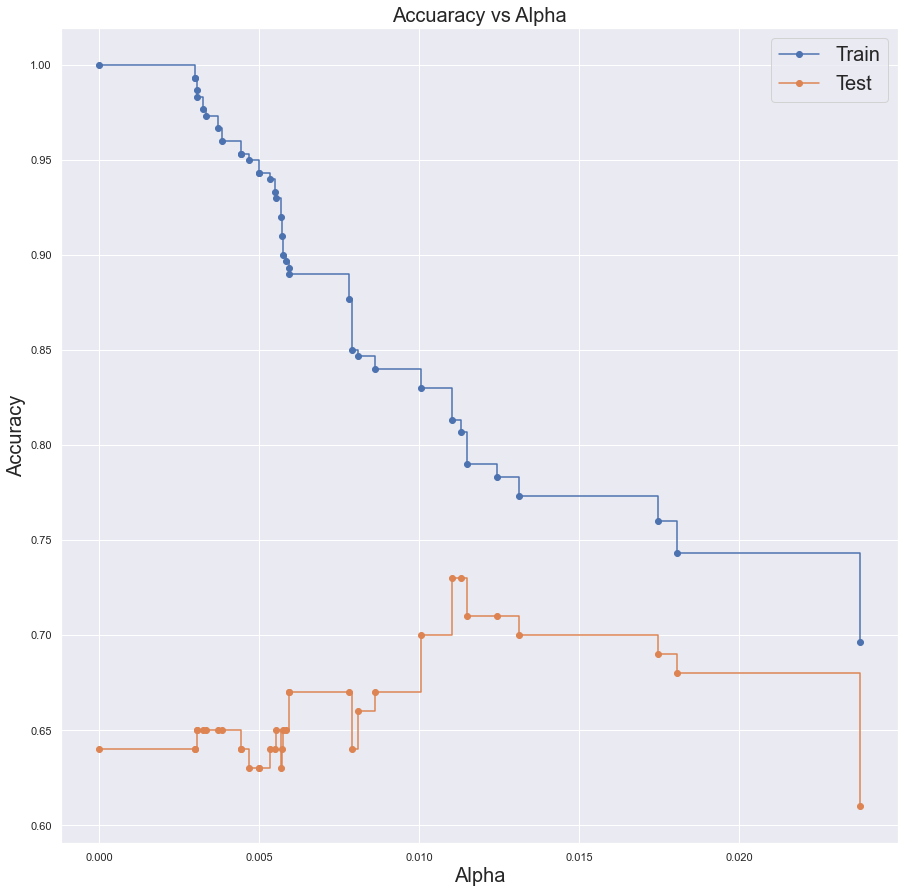

In [23]:
fig, ax = plt.subplots(figsize = (15,15))
ax.set_xlabel('Alpha', fontsize = 20)
ax.set_ylabel('Accuracy', fontsize = 20)
ax.set_title('Accuaracy vs Alpha', fontsize = 20)
ax.plot(ccp_alphas, train_scores, drawstyle = 'steps-post', marker = 'o', label = 'Train' )
ax.plot(ccp_alphas, test_scores, drawstyle = 'steps-post', marker = 'o', label = 'Test')
ax.legend(fontsize = 20)
plt.show()

In [24]:
#Determining the best alpha
kfold = KFold(10)
alpha_values = []
for ccp_alpha in ccp_alphas:
    tree = DecisionTreeClassifier(random_state = 42, criterion = 'gini', ccp_alpha =  ccp_alpha)
    scores = cross_val_score(tree, X_train, y_train, cv = kfold)
    alpha_values.append([ccp_alpha, np.mean(scores), np.std(scores)])
alpha_results = pd.DataFrame(alpha_values, columns = ['alpha', 'mean_accuracy', 'std'])
alpha_results

,alpha,mean_accuracy,std
0,0.000000,0.663333,0.083600
1,0.003000,0.666667,0.082999
2,0.003000,0.666667,0.082999
3,0.003045,0.666667,0.082999
4,0.003056,0.666667,0.082999
5,0.003229,0.666667,0.082999
6,0.003333,0.670000,0.083600
7,0.003715,0.663333,0.079512
8,0.003852,0.663333,0.079512
9,0.004444,0.653333,0.073333


<AxesSubplot:xlabel='alpha'>

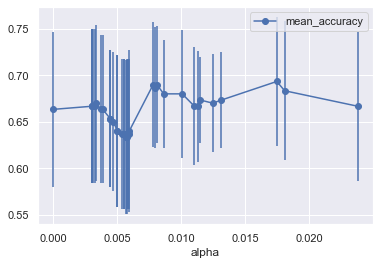

In [25]:
alpha_results.plot(x = 'alpha', y = 'mean_accuracy', yerr = 'std', marker = 'o')


In [26]:
accuracy_max = max(alpha_results['mean_accuracy'])
alpha_ideal = alpha_results[alpha_results['mean_accuracy'] == accuracy_max]
alpha_ideal = float(alpha_ideal['alpha'])
alpha_ideal

0.01745501804325334

In [27]:
#Purned Decision tree
tree_pruned = DecisionTreeClassifier(random_state = 42, criterion = 'gini', ccp_alpha = alpha_ideal)
tree_pruned.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.01745501804325334, random_state=42)

In [28]:
predictions = tree_pruned.predict(X_test)
pred_df = pd.DataFrame()
pred_df['Actual'] = y_test
pred_df['Predicted'] = predictions
np.mean(predictions == y_test)

0.69

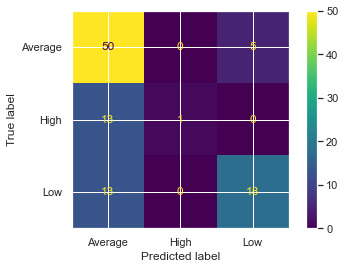

In [29]:
plot_confusion_matrix(tree_pruned, X_test, y_test)

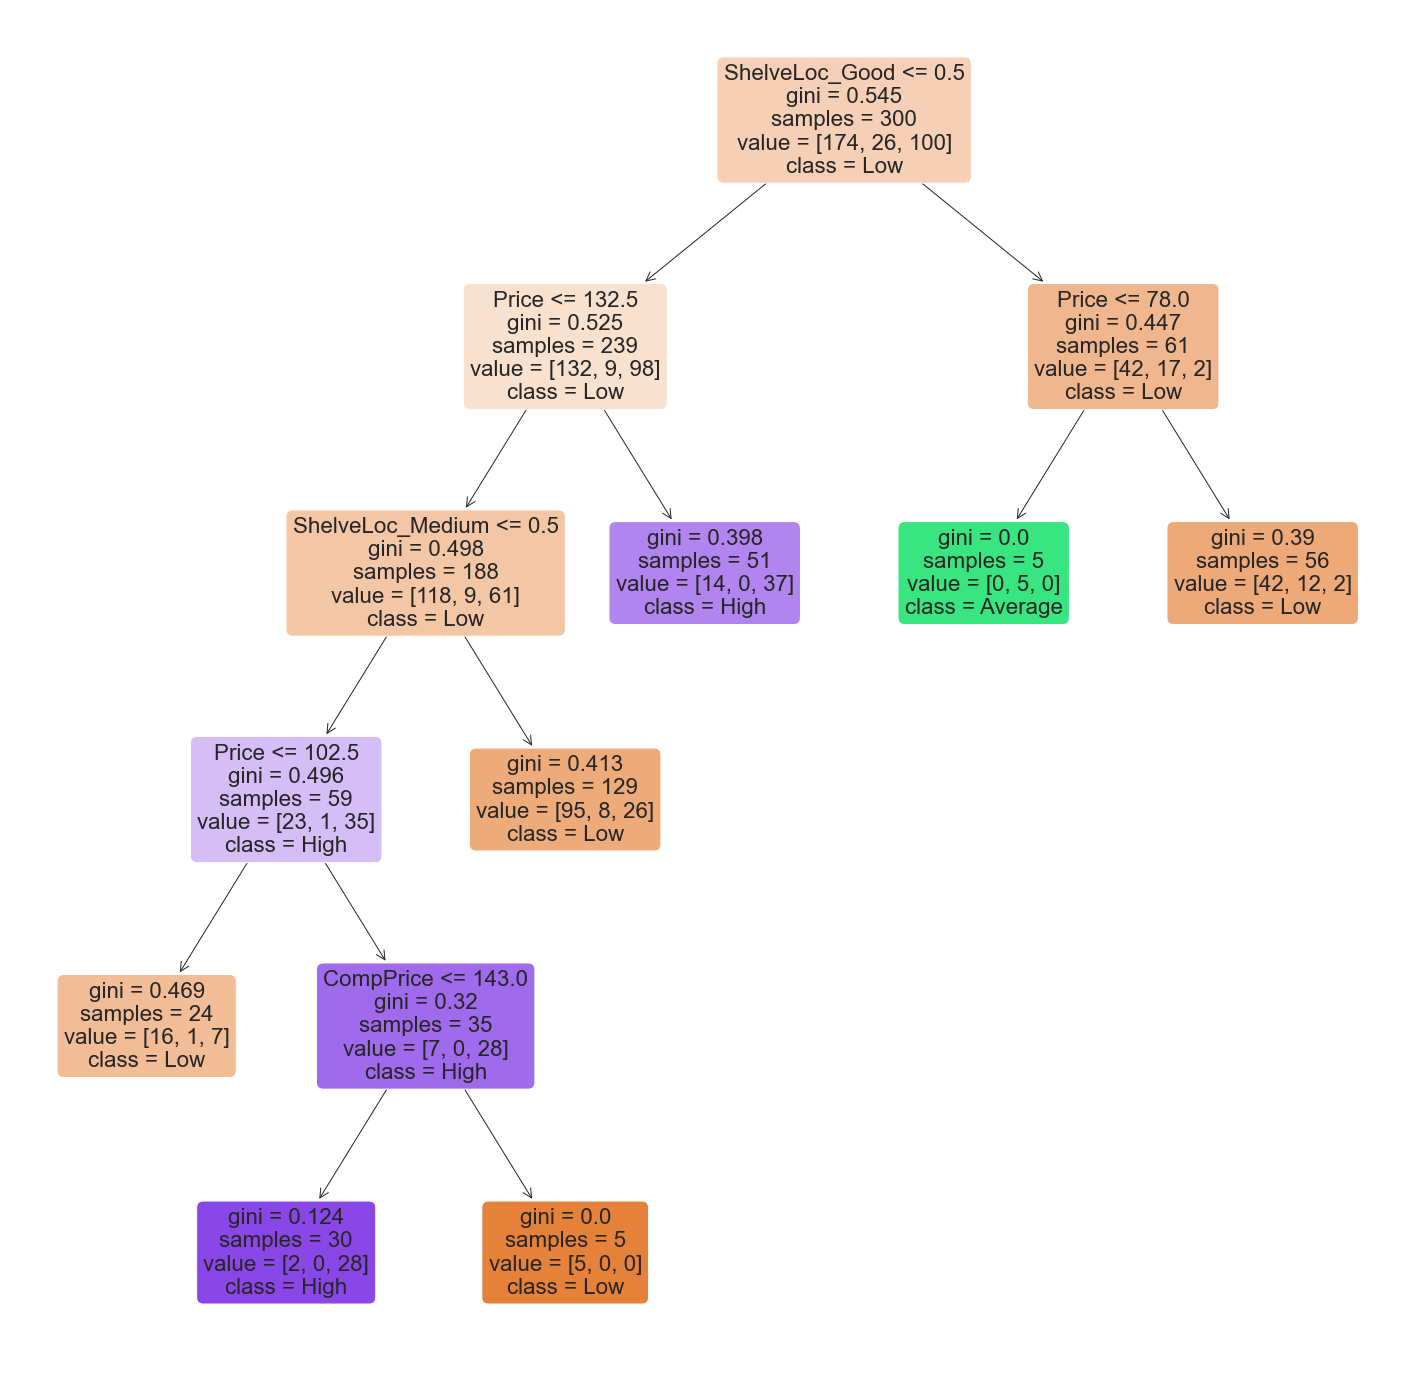

In [30]:
plt.figure(figsize = (25,25))
plot_tree(tree_pruned, filled = True, rounded = True, feature_names = X.columns, class_names = ['Low', 'Average', 'High'])
plt.show()